<a href="https://colab.research.google.com/github/DARSHITA2804/DEEPLEARNING/blob/main/lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision matplotlib numpy tqdm


100%|██████████| 9.91M/9.91M [00:00<00:00, 38.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.15MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.93MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.70MB/s]


Epoch [1/10], Loss: 0.0378
Epoch [2/10], Loss: 0.0290
Epoch [3/10], Loss: 0.0229
Epoch [4/10], Loss: 0.0193
Epoch [5/10], Loss: 0.0176
Epoch [6/10], Loss: 0.0178
Epoch [7/10], Loss: 0.0155
Epoch [8/10], Loss: 0.0152
Epoch [9/10], Loss: 0.0137
Epoch [10/10], Loss: 0.0133


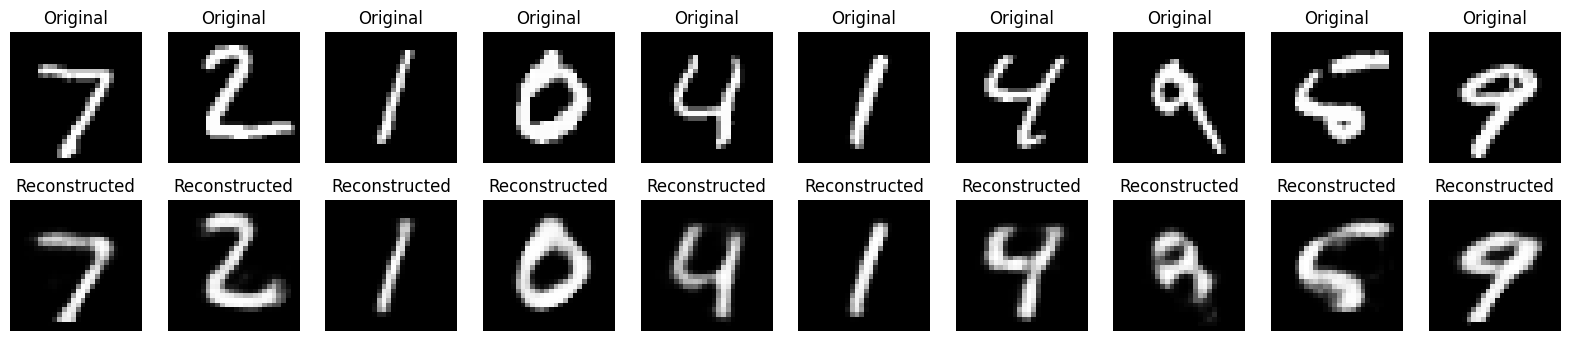

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load MNIST dataset
# -----------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

# -----------------------------
# 2. Define Autoencoder model
# -----------------------------
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder: compress from 784 → 32
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 32)
        )
        # Decoder: reconstruct from 32 → 784
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28*28),
            nn.Sigmoid()  # keep output between 0 and 1
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = decoded.view(-1, 1, 28, 28)
        return decoded

# -----------------------------
# 3. Train the model
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 10
for epoch in range(num_epochs):
    for data, _ in train_loader:
        img = data.to(device)
        output = model(img)
        loss = criterion(output, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# -----------------------------
# 4. Visualize results
# -----------------------------
model.eval()
with torch.no_grad():
    for data, _ in test_loader:
        img = data.to(device)
        output = model(img)
        break  # just one batch for visualization

# Compare original vs reconstructed images
img = img.cpu().numpy()
output = output.cpu().numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(img[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(output[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()


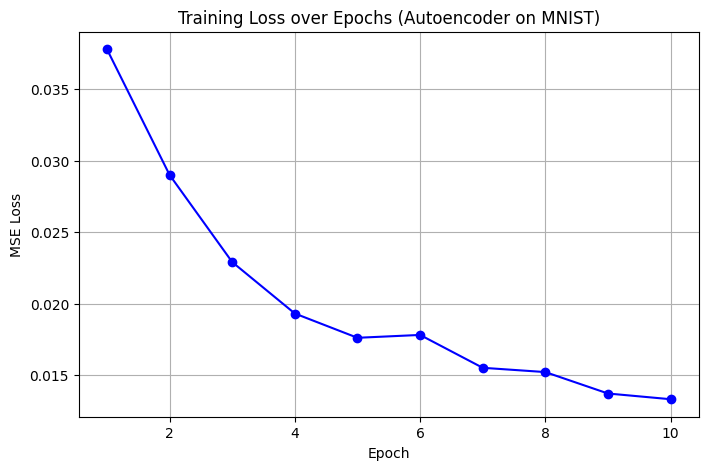

In [6]:
import matplotlib.pyplot as plt

# your recorded epoch losses
train_losses = [0.0378, 0.0290, 0.0229, 0.0193, 0.0176, 0.0178, 0.0155, 0.0152, 0.0137, 0.0133]

# plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o', linestyle='-', color='b')
plt.title('Training Loss over Epochs (Autoencoder on MNIST)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()
